# INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.n

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
#using this we don't requie to write "plot.show" everytime while plotting a diagram

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

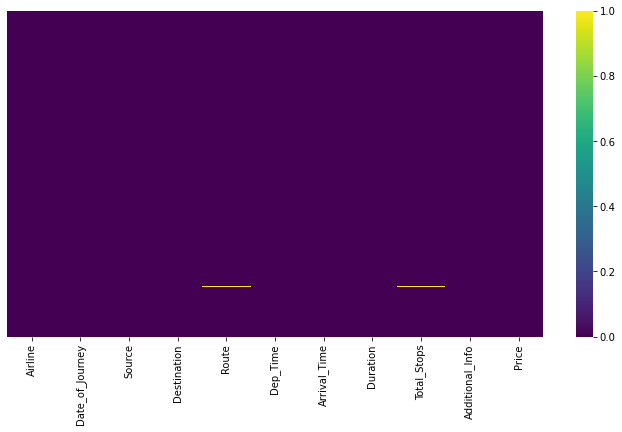

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

sns.heatmap(train_data.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')

In [10]:
# data = train_data.append(test_data)
# data.head()

In [11]:
train_data.shape

(10683, 11)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

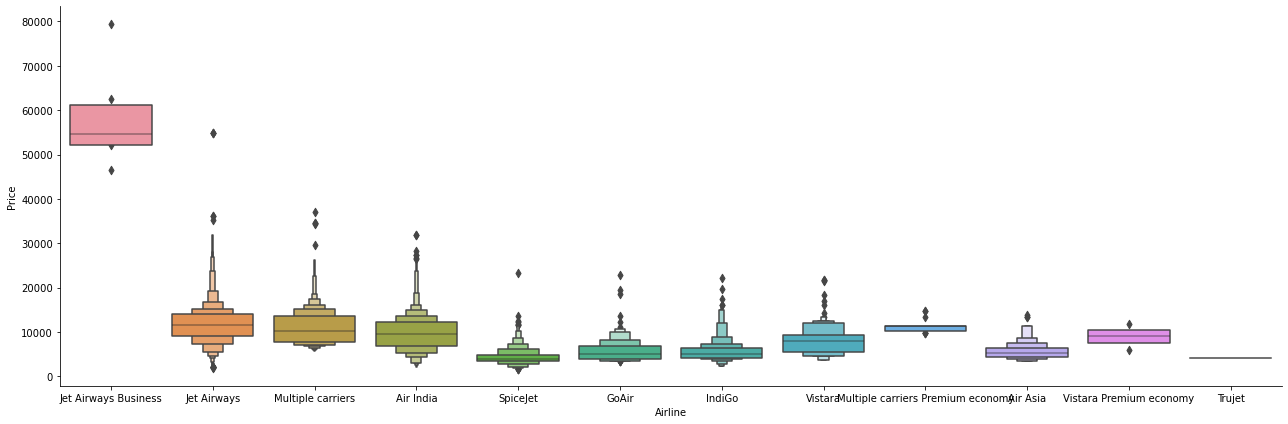

In [14]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [15]:
#data[data['Airline']].groupby('Destination').size()

In [16]:
train_data.groupby(['Airline','Destination']).size().reset_index()

,Airline,Destination,0
0,Air Asia,Banglore,150
1,Air Asia,Cochin,80
2,Air Asia,Delhi,71
3,Air Asia,New Delhi,18
4,Air India,Banglore,512
5,Air India,Cochin,747
6,Air India,Delhi,120
7,Air India,Hyderabad,136
8,Air India,Kolkata,25
9,Air India,New Delhi,212


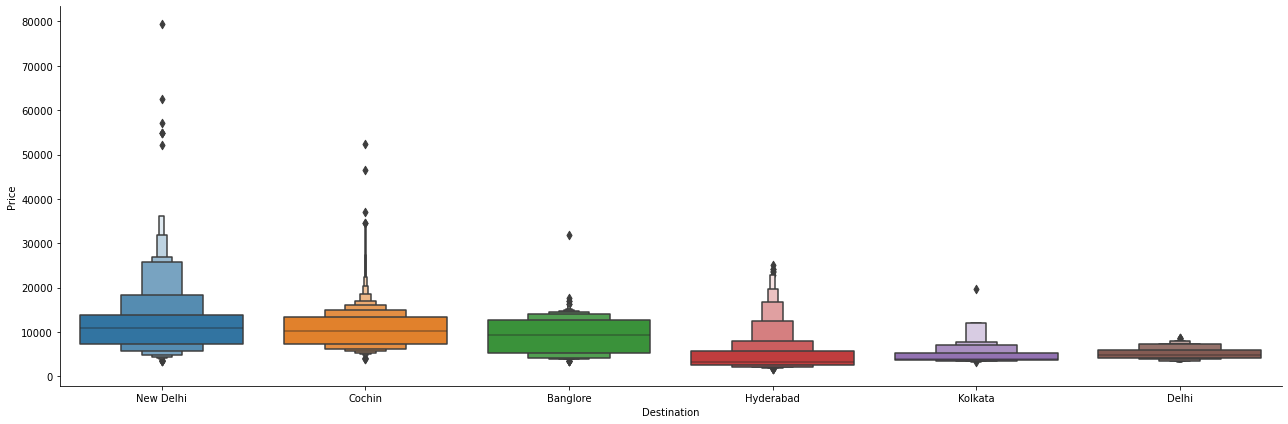

In [17]:
# Price vs Destination
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Changing Date Format

In [18]:
train_data['day'] = train_data['Date_of_Journey'].str.split('/').str[0]
train_data['month'] = train_data['Date_of_Journey'].str.split('/').str[1]
train_data['year'] = train_data['Date_of_Journey'].str.split('/').str[2]

# Another Method using a lambda function

data['day'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[0])

data['month'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[1])

data['year'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[2])



In [19]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [20]:
train_data['day'] = train_data['day'].astype(int)
train_data['month'] = train_data['month'].astype(int)
train_data['year'] = train_data['year'].astype(int)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  day              10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [22]:
train_data.drop('Date_of_Journey',axis = 1, inplace = True)

In [23]:
train_data['Arrival_Time'] = train_data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [24]:
train_data['Arrival_hour'] = train_data['Arrival_Time'].apply(lambda x:x.split(':')[0])
train_data['Arrival_minutes'] = train_data['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [25]:
train_data['Arrival_hour'] = train_data['Arrival_hour'].astype(int)
train_data['Arrival_minutes'] = train_data['Arrival_minutes'].astype(int)

In [26]:
train_data.drop('Arrival_Time',axis = 1, inplace = True)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [28]:
#data['Dep_Time'] = data['Dep_Time'].apply(lambda x:x.split(':')[0])

In [29]:
#data['Dep_Time']

In [30]:
# data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

train_data['Dept_hour'] = train_data['Dep_Time'].apply(lambda x:x.split(':')[0])
train_data['Dept_minutes'] = train_data['Dep_Time'].apply(lambda x:x.split(':')[1])

train_data['Dept_hour'] = train_data['Dept_hour'].astype(int)
train_data['Dept_minutes'] = train_data['Dept_minutes'].astype(int)

train_data.drop('Dep_Time',axis = 1, inplace = True)

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [32]:
# # Time taken by plane to reach destination is called Duration
# # It is the differnce betwwen Departure Time and Arrival time


# # Assigning and converting Duration column into list
# duration = list(train_data["Duration"])

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
#         if "h" in duration[i]:
#             duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
#         else:
#             duration[i] = "0h " + duration[i]           # Adds 0 hour

# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
#     duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [33]:
# # Adding duration_hours and duration_mins list to train_data dataframe

# train_data["Duration_hours"] = duration_hours
# train_data["Duration_mins"] = duration_mins

In [34]:
#train_data.drop(["Duration"], axis = 1, inplace = True)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [36]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [37]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

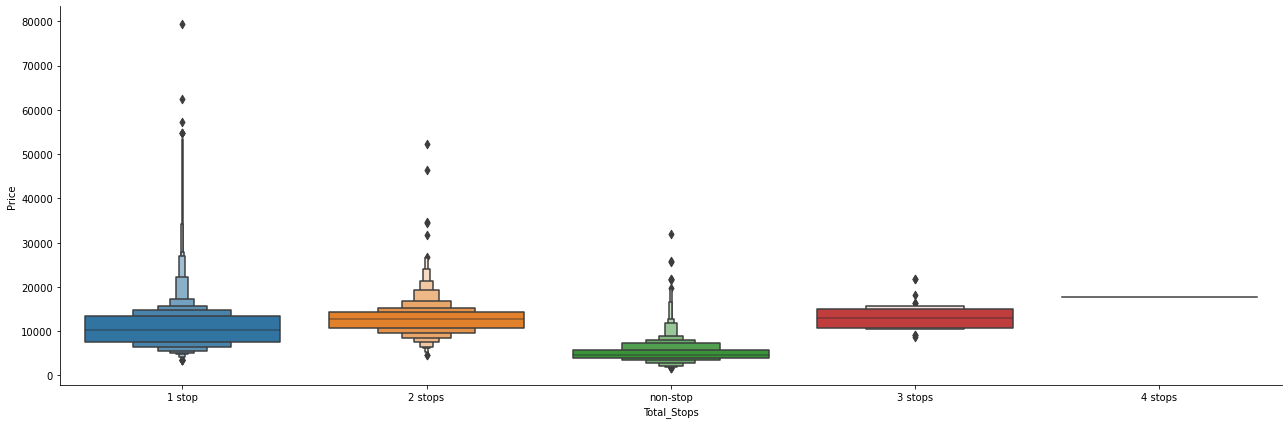

In [38]:
# Source vs Price

sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [39]:
# #Graph of Total_Stops vs Price
# sns.catplot(y='Price', x='Total_Stops', train_data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
# plt.show()

In [40]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


Only one nan value is present

In [41]:
# Instead of Focusing on 'Route' we will focus on 'Total_Stops' coz its easy and the ticket price would drastically change 
# if there are multiple stops.
# we replace nan value with one coz from Delhi to Cochin there would atleast be 1 stop and only 1 nan value is present so it would not get affect a lot

train_data['Total_Stops'] = train_data['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop' : 2, '3 stops' : 3, '4 stops' : 4, 'nan' : 1})

In [42]:
train_data.drop('Route', axis = 1, inplace = True)

In [43]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302,1,3,2019,21,35,16,50


# Change Duration to minutes

In [44]:
# data['duration_hour'] = data['Duration'].apply(lambda x:x.split(' ')[0])
# data['duration_minutes'] = data['Duration'].apply(lambda x:x.split(' ')[1])

In [45]:
train_data['duration_hr'] = train_data['Duration'].str.split(' ').str[0]
train_data['duration_hr']

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: duration_hr, Length: 10683, dtype: object

In [46]:
train_data['duration_hr'] = train_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
train_data['duration_hr']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10683, dtype: object

In [47]:
train_data['duration_mins'] = train_data['Duration'].str.split(' ').str[1].str.split('m').str[0]
train_data['duration_mins']

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: duration_mins, Length: 10683, dtype: object

In [48]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302,1,3,2019,21,35,16,50,4,45


In [49]:
train_data.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops        float64
Additional_Info     object
Price                int64
day                  int32
month                int32
year                 int32
Arrival_hour         int32
Arrival_minutes      int32
Dept_hour            int32
Dept_minutes         int32
duration_hr         object
duration_mins       object
dtype: object

In [50]:
train_data[train_data['duration_hr'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
6474,Air India,Mumbai,Hyderabad,5m,1.0,No info,17327,6,3,2019,16,55,16,50,5m,NaN


It is not possible for a flight to go from mum to hy in 5mins despilt of having 2 stops so its an outliers, so let drop these

In [51]:
train_data.drop(6474,axis = 0, inplace = True)
train_data.drop(2660, axis = 0, inplace = True)

In [52]:
train_data[train_data['duration_hr'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins


In [53]:
# handling nan values in duration_mins

train_data.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           1
Additional_Info       0
Price                 0
day                   0
month                 0
year                  0
Arrival_hour          0
Arrival_minutes       0
Dept_hour             0
Dept_minutes          0
duration_hr           0
duration_mins      1030
dtype: int64

In [54]:
# so we have many nan values in duration_mins i.e we we have to replace them with 0 

train_data['duration_mins'].fillna(0, inplace=True)


In [55]:
train_data[train_data['Total_Stops'].isna()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45,23,40


In [56]:
# Atleast one stop should be taken
train_data['Total_Stops'].fillna(1, inplace=True)

In [57]:
# handling nan values in duration_mins

train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
day                0
month              0
year               0
Arrival_hour       0
Arrival_minutes    0
Dept_hour          0
Dept_minutes       0
duration_hr        0
duration_mins      0
dtype: int64

In [58]:
train_data['duration_hr'] = train_data['duration_hr'].astype('int')
train_data['duration_mins'] = train_data['duration_mins'].astype('int')

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Duration         10681 non-null  object 
 4   Total_Stops      10681 non-null  float64
 5   Additional_Info  10681 non-null  object 
 6   Price            10681 non-null  int64  
 7   day              10681 non-null  int32  
 8   month            10681 non-null  int32  
 9   year             10681 non-null  int32  
 10  Arrival_hour     10681 non-null  int32  
 11  Arrival_minutes  10681 non-null  int32  
 12  Dept_hour        10681 non-null  int32  
 13  Dept_minutes     10681 non-null  int32  
 14  duration_hr      10681 non-null  int32  
 15  duration_mins    10681 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(5)
memory usage:

In [60]:
train_data.drop('Duration',axis = 1, inplace = True)

In [61]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,No info,13302,1,3,2019,21,35,16,50,4,45


In [62]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [63]:
train_data["Airline"].value_counts()

Jet Airways                          3848
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

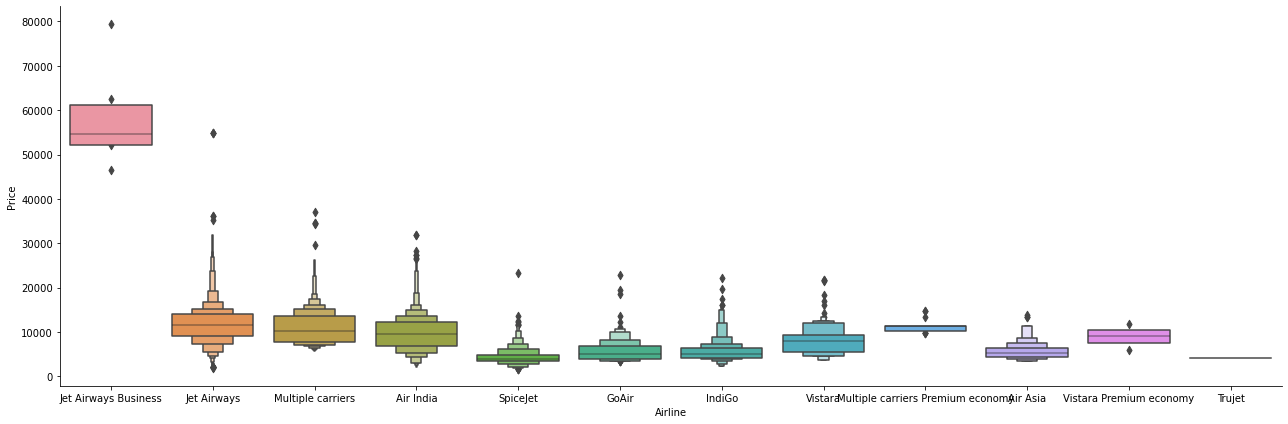

In [64]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [65]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [66]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

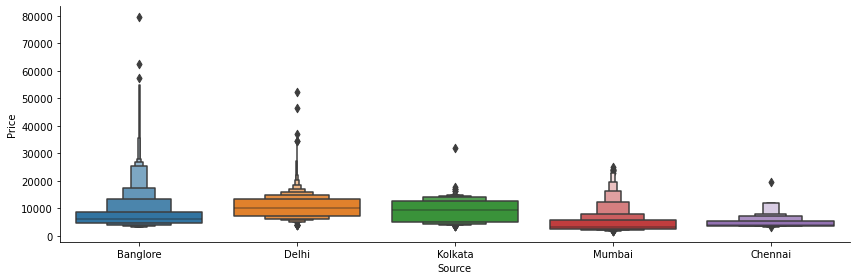

In [67]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [68]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [69]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [70]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [71]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,No info,13302,1,3,2019,21,35,16,50,4,45


In [72]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [73]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,No info,7662,1,5,2019,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,No info,13882,9,6,2019,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2.0,No info,6218,12,5,2019,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2.0,No info,13302,1,3,2019,21,...,0,0,0,0,0,0,0,0,0,1


In [74]:
#data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [75]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,No info,7662,1,5,2019,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,No info,13882,9,6,2019,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2.0,No info,6218,12,5,2019,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2.0,No info,13302,1,3,2019,21,...,0,0,0,0,0,0,0,0,0,1


In [76]:
data_train.shape

(10681, 35)

# Using transformation techqunies do label encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [78]:
train_data['Airline'] = labelencoder.fit_transform(train_data['Airline'])
train_data['Source'] = labelencoder.fit_transform(train_data['Source'])
train_data['Destination'] = labelencoder.fit_transform(train_data['Destination'])
train_data['Additional_Info'] = labelencoder.fit_transform(train_data['Additional_Info'])

In [79]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
0,3,0,5,0.0,8,3897,24,3,2019,1,10,22,20,2,50
1,1,3,0,1.0,8,7662,1,5,2019,13,15,5,50,7,25
2,4,2,1,1.0,8,13882,9,6,2019,4,25,9,25,19,0
3,3,3,0,2.0,8,6218,12,5,2019,23,30,18,5,5,25
4,3,0,5,2.0,8,13302,1,3,2019,21,35,16,50,4,45


In [80]:
# Not recommended (dummy_encoding) in case of train-test split 
pd.get_dummies(train_data,columns = ['Airline','Source','Destination','Additional_Info'],drop_first = True)

,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897,24,3,2019,1,10,22,20,2,...,1,0,0,0,0,0,0,0,1,0
1,1.0,7662,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,1.0,13882,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,2.0,6218,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,2.0,13302,1,3,2019,21,35,16,50,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,2019,22,25,19,55,2,...,0,0,0,0,0,0,0,0,1,0
10679,0.0,4145,27,4,2019,23,20,20,45,2,...,0,0,0,0,0,0,0,0,1,0
10680,0.0,7229,27,4,2019,11,20,8,20,3,...,0,0,0,0,0,0,0,0,1,0
10681,0.0,12648,1,3,2019,14,10,11,30,2,...,1,0,0,0,0,0,0,0,1,0


In [81]:
train_data.shape

(10681, 15)

# Test dataset

In [82]:
test_data = pd.read_excel('Test_set.xlsx')

In [83]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [84]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [85]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


# Feature Selection

In [86]:
train_data.shape

(10681, 15)

In [87]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'day', 'month', 'year', 'Arrival_hour', 'Arrival_minutes',
       'Dept_hour', 'Dept_minutes', 'duration_hr', 'duration_mins'],
      dtype='object')

In [88]:
X = train_data.loc[:, ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
        'day', 'month', 'year', 'Arrival_hour', 'Arrival_minutes',
       'Dept_hour', 'Dept_minutes', 'duration_hr', 'duration_mins']]
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,duration_hr,duration_mins
0,3,0,5,0.0,8,24,3,2019,1,10,22,20,2,50
1,1,3,0,1.0,8,1,5,2019,13,15,5,50,7,25
2,4,2,1,1.0,8,9,6,2019,4,25,9,25,19,0
3,3,3,0,2.0,8,12,5,2019,23,30,18,5,5,25
4,3,0,5,2.0,8,1,3,2019,21,35,16,50,4,45


In [89]:
y = train_data.iloc[:, 1]
y.head()

0    0
1    3
2    2
3    3
4    0
Name: Source, dtype: int32

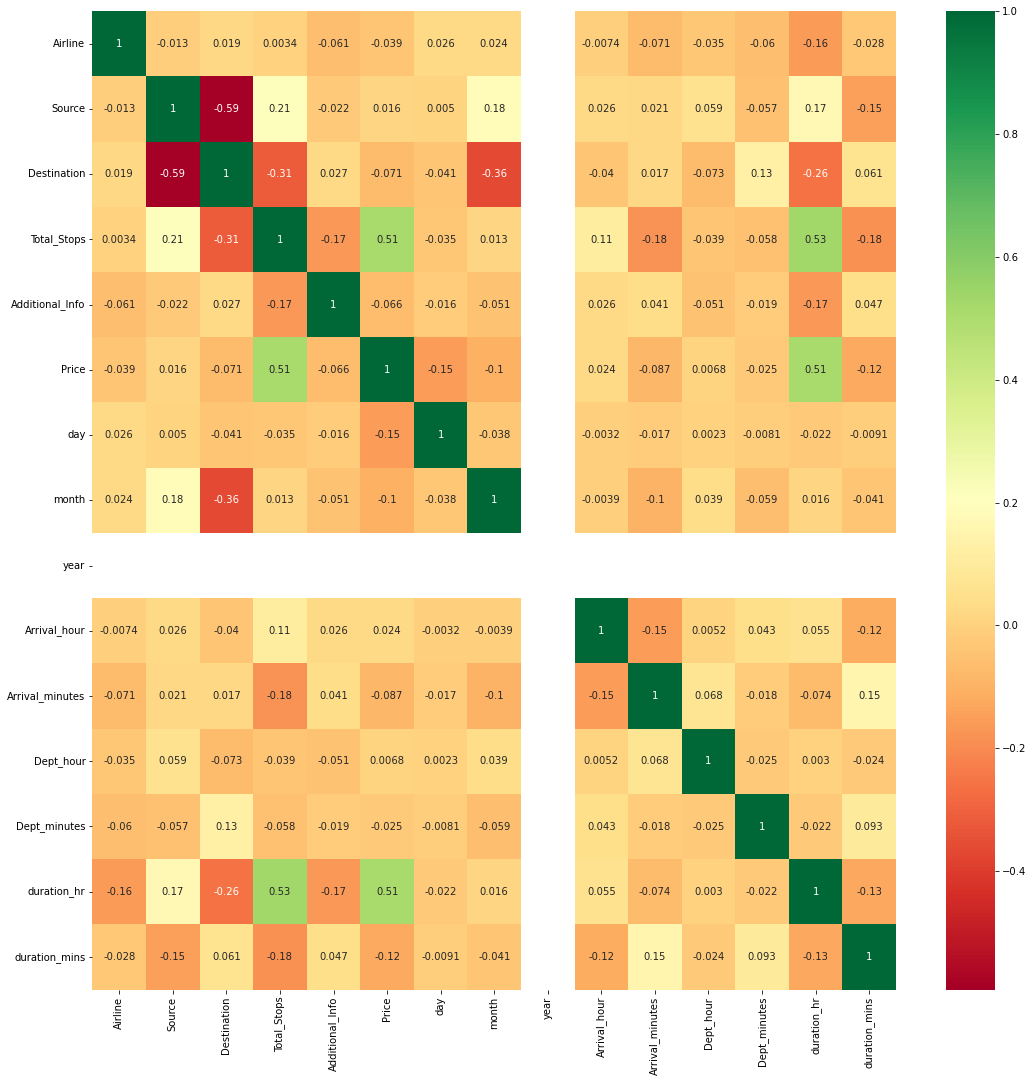

In [90]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [91]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [92]:
print(selection.feature_importances_)

[0.         0.86075626 0.13816661 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00107714 0.        ]


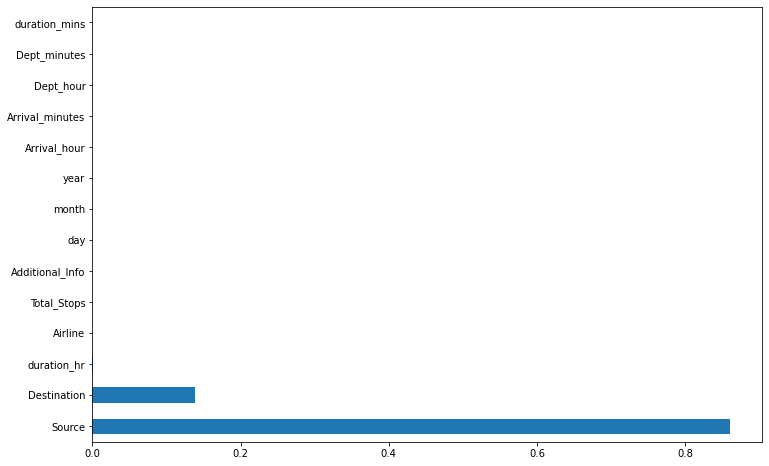

In [93]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Implementing Linear Regression

In [94]:
#seperating independent and dependent variables
x = data.drop(['Price'], axis=1)
y = data['Price']
x.shape, y.shape

NameError: name 'data' is not defined

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.30, random_state = 56)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
X_train = scalar.fit_transform(train_x)
X_test = scalar.fit_transform(test_x)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Implementing Cross Validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()

In [ ]:
cross_val_score(regression, X_train, train_y.values, scoring = 'neg_mean_squared_error',cv=10)

In [ ]:
train_x.isnull().sum()

In [ ]:
data.info()

In [ ]:
# Creating instance of Linear Regresssion
lr = LinearRegression()

# Fitting the model
lr.fit(train_x, train_y)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = regression.predict(X_train)
k = mae(train_predict, X_test)
print('Training Mean Absolute Error', k )